In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load JSON data
with open("../data/books.json", "r") as f:
    books = json.load(f)

# Create DataFrame
df = pd.DataFrame(books)

In [12]:
# Drop rows with missing essential fields
df = df.dropna(subset=["title", "author"])

# Convert numeric columns safely
numeric_cols = [
    "average_rating",
    "ratings_count",
    "price_usd",
    "publication_year",
    "sales_millions"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Normalize genre (replace missing)
df["genre"] = df["genre"].fillna("Unknown")

# Ensure availability is boolean
df["available"] = df["available"].astype(bool)


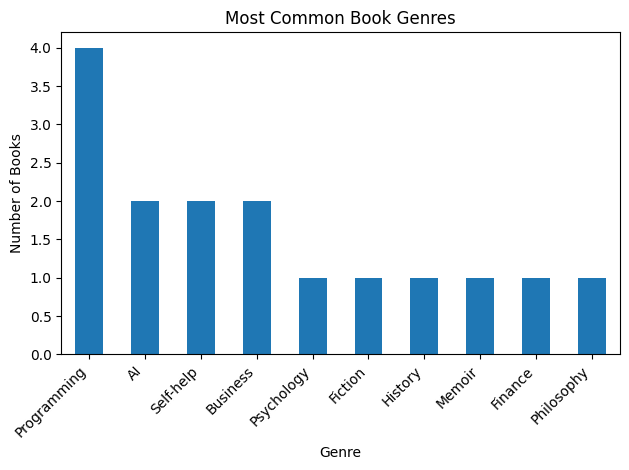

<Figure size 640x480 with 0 Axes>

In [13]:

genre_counts = df["genre"].value_counts()

plt.figure()
genre_counts.plot(kind="bar")
plt.title("Most Common Book Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("../assets/charts/genre_counts.png")


In [14]:
m = 50  # minimum ratings threshold

mean_rating_all = df["average_rating"].mean()

genre_stats = (
    df.groupby("genre")
    .agg(
        mean_average_rating=("average_rating", "mean"),
        median_ratings_count=("ratings_count", "median")
    )
    .dropna()
)

genre_stats["weighted_rating"] = (
    (genre_stats["median_ratings_count"] /
     (genre_stats["median_ratings_count"] + m))
    * genre_stats["mean_average_rating"]
    +
    (m /
     (genre_stats["median_ratings_count"] + m))
    * mean_rating_all
)

genre_stats = genre_stats.sort_values(
    by="weighted_rating", ascending=False
)


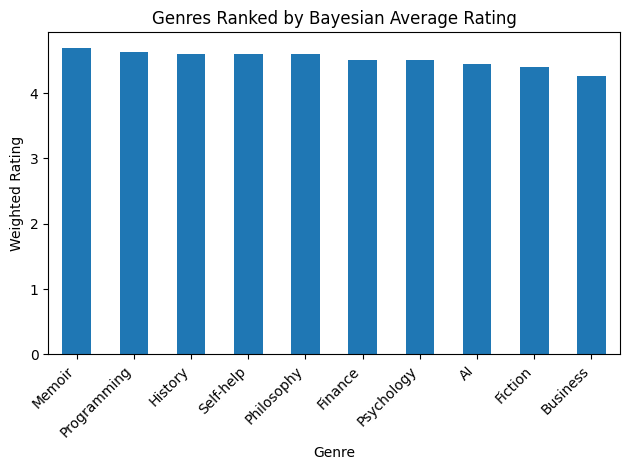

<Figure size 640x480 with 0 Axes>

In [15]:

plt.figure()
genre_stats["weighted_rating"].plot(kind="bar")
plt.title("Genres Ranked by Bayesian Average Rating")
plt.xlabel("Genre")
plt.ylabel("Weighted Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("../assets/charts/avg_ratings.png")


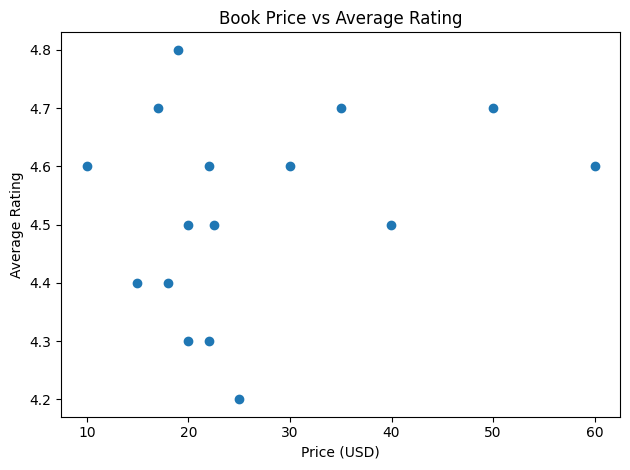

<Figure size 640x480 with 0 Axes>

In [16]:
price_rating_df = df.dropna(subset=["price_usd", "average_rating"])

plt.figure()
plt.scatter(
    price_rating_df["price_usd"],
    price_rating_df["average_rating"]
)
plt.title("Book Price vs Average Rating")
plt.xlabel("Price (USD)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()
plt.savefig("../assets/charts/price_vs_rating.png")

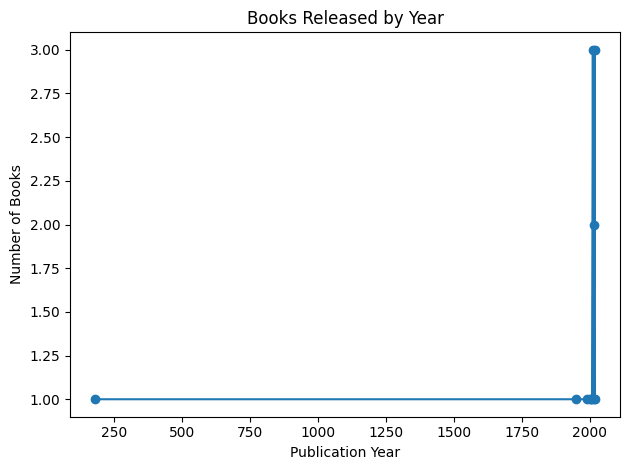

<Figure size 640x480 with 0 Axes>

In [17]:
books_by_year = (
    df.dropna(subset=["publication_year"])
      .groupby("publication_year")
      .size()
)

plt.figure()
books_by_year.plot(kind="line", marker="o")
plt.title("Books Released by Year")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()
plt.savefig("../assets/charts/books_by_year.png")

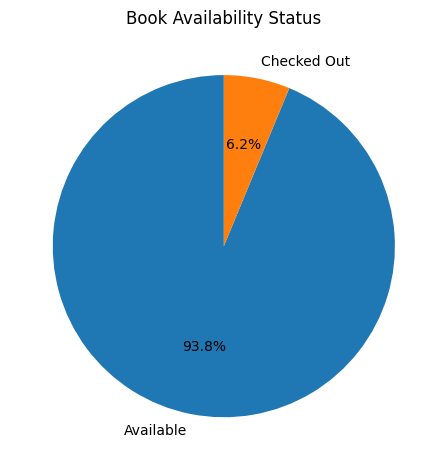

<Figure size 640x480 with 0 Axes>

In [18]:
availability_counts = df["available"].value_counts()

labels = ["Available", "Checked Out"]

plt.figure()
plt.pie(
    availability_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Book Availability Status")
plt.tight_layout()
plt.show()
plt.savefig("../assets/charts/available_pie.png")